# **Stock Market Prediction And Forecasting Using Stacked LSTM**

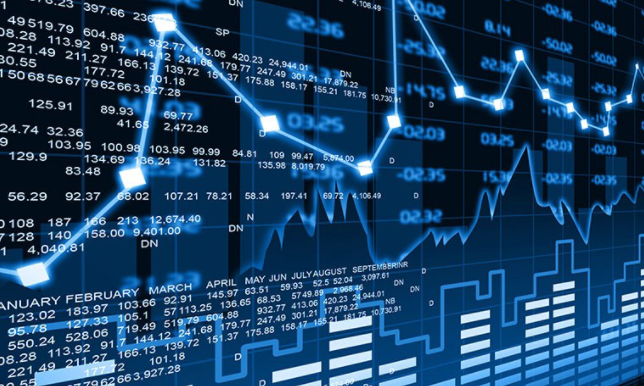

**Dataset_Link :** https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM ,Activation

In [2]:
#reading the data from the dataset_link:
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [3]:
#First 5 entries of data
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
#shape of data
df.shape

(2035, 8)

In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
#describe
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
#isnull
df.isnull().value_counts()

Date   Open   High   Low    Last   Close  Total Trade Quantity  Turnover (Lacs)
False  False  False  False  False  False  False                 False              2035
dtype: int64

In [8]:
#corr 
df.corr(method='pearson')

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


In [9]:
#converting the Date columns from object datatype to Dtype (datetype)
df['Date'] =pd.to_datetime(df['Date'],infer_datetime_format=True)

In [10]:
#checking the data type:
print("Data_type:",df['Date'].dtypes)

Data_type: datetime64[ns]


In [11]:
#Turnover (Lacs) per year sum data
df.groupby(df['Date'].dt.to_period('Y'))['Turnover (Lacs)'].agg(['sum', 'mean', 'max','min'])

,sum,mean,max,min
Date,,,,
2010,173424.35,1508.037826,9645.18,291.93
2011,304230.86,1231.703887,10685.03,163.11
2012,839304.24,3343.841594,18764.68,37.04
2013,906908.50,3627.634000,17299.48,241.12
2014,1018418.44,4173.846066,28176.94,179.78
2015,575115.45,2319.013911,10128.78,128.04
2016,599627.49,2427.641660,14554.90,498.73
2017,1871250.47,7545.364798,55755.08,517.65
2018,1648180.65,8909.084595,46643.39,2676.63


In [12]:
#Total Trade Quantity 
df.groupby(df['Date'].dt.to_period('A'))['Total Trade Quantity'].agg([sum,max,min])

,sum,max,min
Date,,,
2010,142680253,7163066,232370
2011,312492166,9568830,169762
2012,633689152,17917625,39610
2013,616781639,11917625,163605
2014,649734073,17064363,125170
2015,403950894,6857158,100180
2016,458456289,9741635,425216
2017,916840682,29191015,414927
2018,618486510,16822847,1104173


In [13]:
#High Values Max--Min per Year
print("High  [Max]---[Min]")
print(df.groupby(df['Date'].dt.to_period('Y'))['High'].agg([max,min]))
print('\n')
#Low values Max--Min per Year
print("Low   [Max]---[Min]")
print(df.groupby(df['Date'].dt.to_period('Y'))['Low'].agg([max,min]))

High  [Max]---[Min]
         max     min
Date                
2010  138.75  108.95
2011  115.40   82.80
2012  181.50   91.90
2013  170.00  125.10
2014  177.15  140.95
2015  167.75  118.75
2016  157.70  104.60
2017  318.00  124.20
2018  328.75  223.70


Low   [Max]---[Min]
         max     min
Date                
2010  133.30  103.50
2011  111.60   80.00
2012  172.50   86.00
2013  167.25  121.55
2014  173.10  135.25
2015  159.20  108.55
2016  152.00  100.00
2017  306.35  121.35
2018  321.65  212.65


#  **EDA**

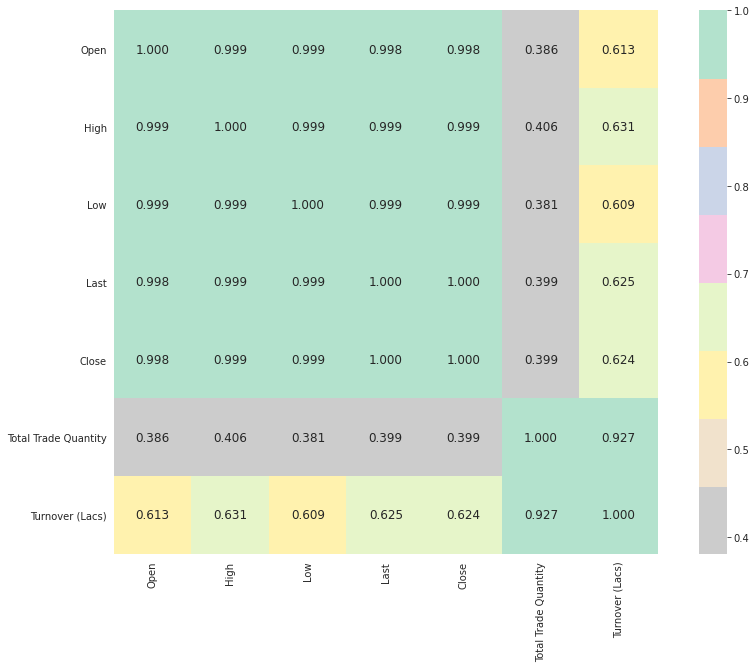

In [14]:
#heat map co-relation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr('pearson'),cbar=True,fmt='.3f',annot=True,annot_kws={'size':12},square=True,cmap='Pastel2_r')

In [15]:
#row year is made
df['year'] = pd.DatetimeIndex(df['Date']).year

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


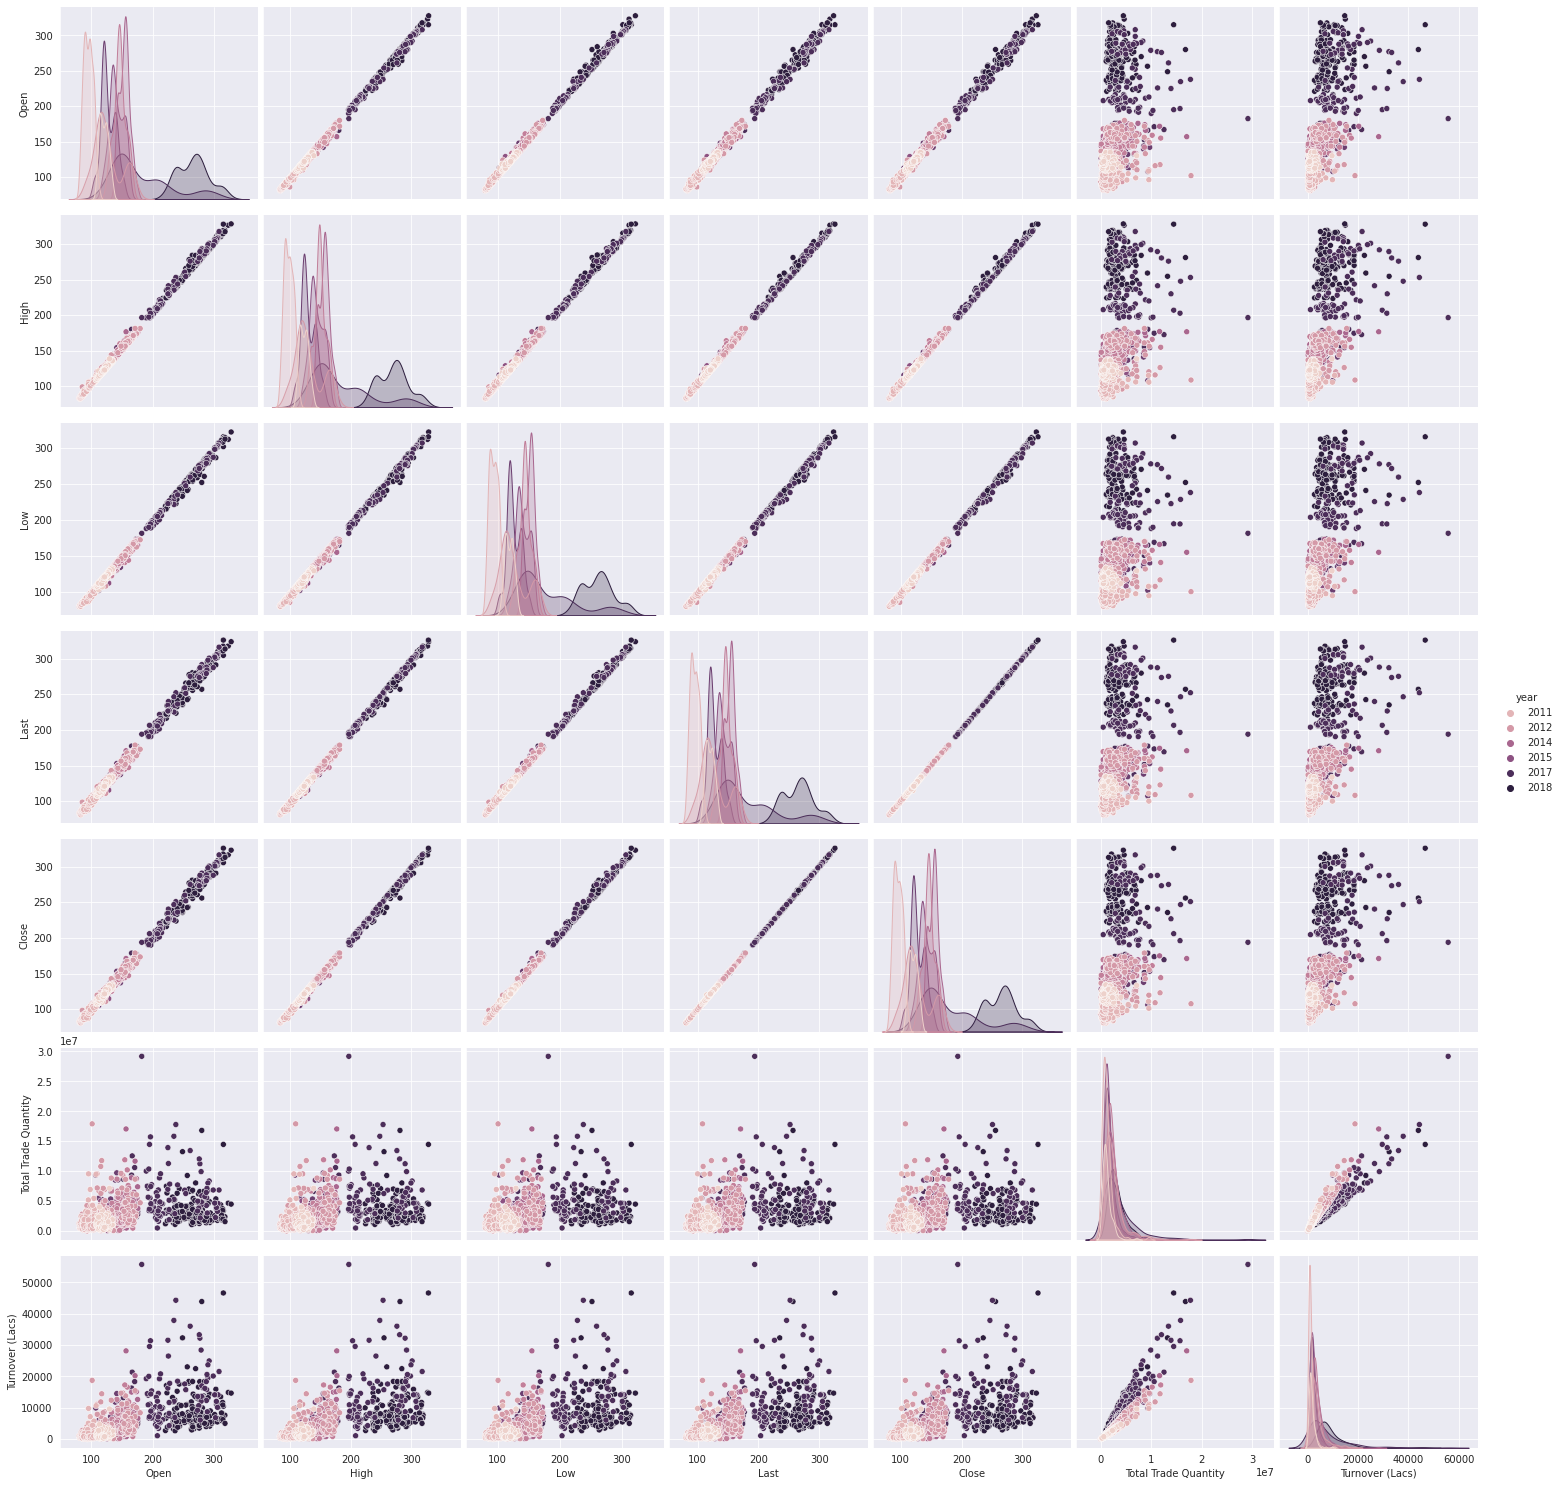

In [16]:
#pair plot 
sns.pairplot(df,hue='year',size=3)

In [17]:
df1 =df.reset_index()['High']

In [18]:
df1.shape

(2035,)

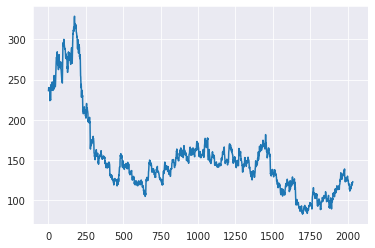

In [19]:
plt.plot(df1)

In [20]:
df2 =df.reset_index()['Turnover (Lacs)']
df2.shape

(2035,)

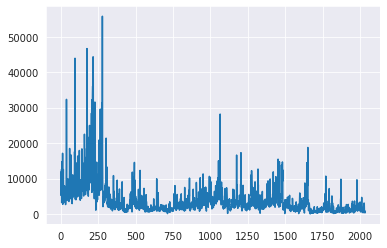

In [21]:
plt.plot(df2)

In [22]:
#From the co-relation plot we can esaily infer that Turnover (Lacs) is highly co-related with High 
# 0.63 which is highest among the other colums 
#so we will use High columns for our predection model.

In [23]:
df1

0       235.95
1       236.80
2       240.00
3       236.75
4       239.20
         ...  
2030    119.50
2031    121.00
2032    121.95
2033    122.00
2034    123.00
Name: High, Length: 2035, dtype: float64

In [24]:
#as we now the LSTM is highly sensitive toward data scaling
from sklearn.preprocessing import MinMaxScaler
Scale =MinMaxScaler(feature_range=(0,1))
df1 =Scale.fit_transform(np.array(df1).reshape(-1,1))

In [25]:
#data_split
train_size =int(len(df1)*0.7)
test_size =len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [26]:
print("train_data_shape:",train_data.shape)
print("test_data_shape:",test_data.shape)

train_data_shape: (1424, 1)
test_data_shape: (611, 1)


In [27]:
#create a dataset we have to convert the array values to dataset matrix
#craeting a fuction so by only passing the values we can get the dataset matrix
import numpy
def crt_data(dataset,time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
   a = dataset[i:(i+time_step), 0]  
   dataX.append(a)
   dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [28]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = crt_data(train_data, time_step)
X_test, y_test = crt_data(test_data, time_step)

In [29]:
print("X_train_shape :",X_train.shape)
print("X_test_shape :",X_test.shape)
print("y_train_shape :",y_train.shape)
print("y_test_shape :",y_test.shape)

X_train_shape : (1323, 100)
X_test_shape : (510, 100)
y_train_shape : (1323,)
y_test_shape : (510,)


In [30]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [31]:
## Creating LSTM model
model =Sequential()
model.add(LSTM(60,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(60,return_sequences=True))
model.add(LSTM(60,return_sequences=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer ='adam')

In [32]:
#reatrun the complete structure 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 60)           14880     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           29040     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 60)           29040     
_________________________________________________________________
dense (Dense)                (None, 100, 1)            61        
Total params: 73,021
Trainable params: 73,021
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=60,batch_size=64)

Epoch 1/60
21/21 [==============================] - 13s 143ms/step - loss: 0.0354 - val_loss: 0.0131
Epoch 2/60
21/21 [==============================] - 2s 81ms/step - loss: 0.0151 - val_loss: 0.0070
Epoch 3/60
21/21 [==============================] - 2s 80ms/step - loss: 0.0132 - val_loss: 0.0067
Epoch 4/60
21/21 [==============================] - 2s 81ms/step - loss: 0.0121 - val_loss: 0.0067
Epoch 5/60
21/21 [==============================] - 2s 81ms/step - loss: 0.0116 - val_loss: 0.0053
Epoch 6/60
21/21 [==============================] - 2s 79ms/step - loss: 0.0116 - val_loss: 0.0053
Epoch 7/60
21/21 [==============================] - 2s 81ms/step - loss: 0.0106 - val_loss: 0.0065
Epoch 8/60
21/21 [==============================] - 2s 81ms/step - loss: 0.0106 - val_loss: 0.0054
Epoch 9/60
21/21 [==============================] - 2s 80ms/step - loss: 0.0103 - val_loss: 0.0063
Epoch 10/60
21/21 [==============================] - 2s 80ms/step - loss: 0.0101 - val_loss: 0.0050
Epoch 1

In [34]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [34]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

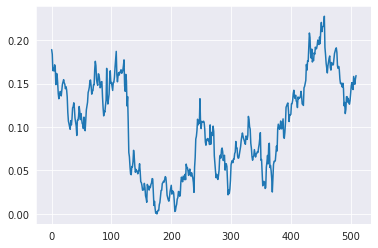

In [48]:
plt.plot(X_test[:,-1])

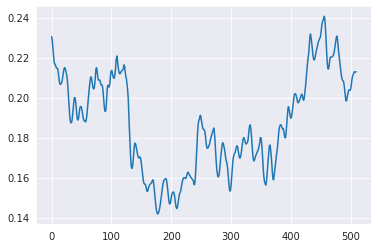

In [49]:
plt.plot(test_predict[:,-1])